In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Url_da_Pagina_do_imovel,Url_do_Imovel,Preco,Tipo_de_Imovel,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,...,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,Faixa_Area_util,Faixa_fotos,faixa_area_construida,faixa_preco,geometry
0,0,0,30365582,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/30365582/,400.0,T0,50,0,sem elevador,...,218.6,56.6,18,31.0,4,51-75,10-20,51-75,176-395,POINT (40.8374358 -8.6551784)


In [4]:
# Separando as colunas em numéricas e categóricas
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df_final.select_dtypes(include=['object']).columns.tolist()

In [5]:
lst_vars_remove = ['Nivel_de_eficiencia_Energetica',                       
'Endereco_Municipio',
'geometry',
'Url_da_Pagina_do_imovel',
'Url_do_Imovel',              
'Tipo_de_Imovel',
'Numero_de_recomendacoes_recebidas',
'Nome_do_proprietario_ou_corretor',
'ad_recommendationId',
'Nome_Regiao',
'Nome_Cidade',
'Faixa_fotos',
'faixa_preco']
for var in lst_vars_remove:
    print(var)
    object_cols.remove(var)

Nivel_de_eficiencia_Energetica
Endereco_Municipio
geometry
Url_da_Pagina_do_imovel
Url_do_Imovel
Tipo_de_Imovel
Numero_de_recomendacoes_recebidas
Nome_do_proprietario_ou_corretor
ad_recommendationId
Nome_Regiao
Nome_Cidade
Faixa_fotos
faixa_preco


In [6]:
numeric_cols.remove('RowId')
numeric_cols.remove('RowId.1')
numeric_cols.remove('Id_do_imovel')
numeric_cols.remove('Preco')  # Removendo a coluna 'Preco' dos dados de entrada
numeric_cols.remove('Id_do_proprietario')   
numeric_cols.remove('Preco_por_metro_quadrado') # Removendo a coluna 'Preco_por_metro_quadrado' dos dados de entrada
numeric_cols.remove('Tipo_de_origem_de_anuncio_recomendada')

In [7]:
# Vamos assegurar que 'Preco' está na lista de colunas numéricas
if 'Preco' not in numeric_cols:
    raise ValueError("'Preco' não encontrado nas colunas numéricas. Verifique os dados e tente novamente.")
    

ValueError: 'Preco' não encontrado nas colunas numéricas. Verifique os dados e tente novamente.

In [8]:
df_final = df_final.dropna(subset=['Faixa_Area_util'])

In [9]:
# Separamos o dataframe em features (X) e target (y)
X = df_final[numeric_cols + object_cols]
y = df_final['Preco']

In [10]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [11]:
X_test.count()

Valor_Area_util_do_imovel                         1256
Numero_Andar_do_imovel                            1256
Latitude_imovel                                   1256
Longitude_imovel                                  1256
Tipo_de_Construcao                                1256
Numero_de_Banheiros                               1256
Possui_Jardim                                     1256
Possui_Elevador                                   1256
Possui_Estacionamento                             1256
Possui_Piscina                                    1256
Possui_Terraco                                    1256
Numero_de_Quartos                                 1256
Indicador_Anuncio_possui_planta_baixa             1256
Numero_de_fotos_do_anuncio                        1256
Numero_de_videos_do_anuncio                       1256
Tipo_de_Operacao                                  1256
Tipo_de_proprietario                              1256
Numero_Faixa_Etaria_0-14                          1256
Numero_Fai

Feature Engineering


In [13]:
!pip install feature-engine

In [21]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/87/0f/7630ee4fea60ebab5b0e3c35df570cb295c91ece537231a38105c0f243e8/lightgbm-4.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 2.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 4.1 MB/s eta 0:00:01
   -------------------------------- ------- 1.1/1.3 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.6 MB/s eta 0:00:00


In [23]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/70.9 MB 2.3 MB/s eta 0:00:31
   ---------------------------------------- 0.3/70.9 MB 4.8 MB/s eta 0:00:15
   ---------------------------------------- 0.6/70.9 MB 4.9 MB/s eta 0:00:15
    --------------------------------------- 1.0/70.9 MB 6.0 MB/s eta 0:00:12
    --------------------------------------- 1.3/70.9 MB 5.9 MB/s eta 0:00:12
    --------------------------------------- 1.7/70.9 MB 6.7 MB/s eta 0:00:11
   - -------------------------------------- 2.1/70.9 MB 7.1 MB/s eta 0:00:10
   - -------------------------------------- 2.6/70.9 MB 7.4 MB/s eta 0:00:10
   - -------------------------------------- 3.0/70.9 MB 7.7 MB/s eta 0:00:09
   -- --------------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 94, in read
    self.__buf.write(data)
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\tempfile.py", line 483, in func_wrapper
    return func(*args, **kwargs)
OSError: [Errno 28] No space left on device

During handling of the above exception, anothe

In [16]:
!pip install catboost

     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     ---------------------------------------- 0.1/101.0 MB 4.3 MB/s eta 0:00:24
     ---------------------------------------- 0.4/101.0 MB 5.4 MB/s eta 0:00:19
     ---------------------------------------- 0.8/101.0 MB 6.0 MB/s eta 0:00:17
     ---------------------------------------- 1.1/101.0 MB 6.3 MB/s eta 0:00:16
      --------------------------------------- 1.5/101.0 MB 6.7 MB/s eta 0:00:15
      --------------------------------------- 1.9/101.0 MB 7.0 MB/s eta 0:00:15
      --------------------------------------- 2.3/101.0 MB 7.3 MB/s eta 0:00:14
     - -------------------------------------- 2.7/101.0 MB 7.6 MB/s eta 0:00:13
     - -------------------------------------- 3.3/101.0 MB 8.0 MB/s eta 0:00:13
     - -------------------------------------- 3.7/101.0 MB 8.3 MB/s eta 0:00:12
     - -------------------------------------- 4.3/101.0 MB 8.7 MB/s eta 0:00:12
     - -------------------------------------- 5

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder

In [13]:

# pipeline para modelos baseados em árvores
data_tree_pipe = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=numeric_cols, arbitrary_number=-999)),
                ('categoric_imputer', CategoricalImputer(variables=object_cols, imputation_method='missing', fill_value='missing')),
                ('one_hot_encoder', OneHotEncoder(variables=object_cols))
])

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = [
          ('decision_tree', DecisionTreeRegressor()),
          ('random_forest', RandomForestRegressor()),
          ('lgbm', LGBMRegressor()),
          ('xgb', XGBRegressor()),
          ('catboost', CatBoostRegressor())
]

In [15]:

from sklearn.model_selection import KFold, cross_validate

# definindo a estratégia de validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# definindo a lista de métricas utilizadas
metricas = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# criando um dicionário irá conter os resultados dos modelos
dicionario_resultados = {'model': [], 'r2': [], 'mae': [], 'rmse': []}

In [16]:
# treinando e avaliando todos os modelos que estão na lista `models`
for model in models:
    model_pipe = Pipeline(steps=data_tree_pipe.steps + [model])
    
    cv_results = cross_validate(estimator=model_pipe, X=X_train, y=y_train, scoring=metricas, cv=kfold, n_jobs=-1)
    cv_results_df = pd.DataFrame(cv_results)
    
    r2 = cv_results_df.mean().loc['test_r2']
    mae = np.abs(cv_results_df.mean().loc['test_neg_mean_absolute_error'])
    rmse = np.abs(cv_results_df.mean().loc['test_neg_root_mean_squared_error'])
    
    # populando a tabela com os resultados da regressão logística
    dicionario_resultados['model'].append(model_pipe.steps[-1][0])
    dicionario_resultados['r2'].append(r2)
    dicionario_resultados['mae'].append(mae)
    dicionario_resultados['rmse'].append(rmse)

df_resultados = pd.DataFrame(dicionario_resultados)

In [17]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_resultados.sort_values(by='mae')

,model,r2,mae,rmse
4,catboost,0.76,139.79,190.35
2,lgbm,0.76,140.31,191.90
1,random_forest,0.74,143.45,197.22
3,xgb,0.74,145.06,199.61
0,decision_tree,0.49,193.70,275.62


# Visualizando as Predições do Catboost

In [18]:

best_model = Pipeline(steps=data_tree_pipe.steps + [('catboost', CatBoostRegressor())])

best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test) 

Learning rate set to 0.052838
0:	learn: 377.5205985	total: 140ms	remaining: 2m 20s
1:	learn: 366.5476150	total: 143ms	remaining: 1m 11s
2:	learn: 356.4242017	total: 145ms	remaining: 48.1s
3:	learn: 347.0144229	total: 147ms	remaining: 36.6s
4:	learn: 337.8800940	total: 149ms	remaining: 29.7s
5:	learn: 329.7077268	total: 151ms	remaining: 25.1s
6:	learn: 321.7820986	total: 153ms	remaining: 21.8s
7:	learn: 314.1157701	total: 155ms	remaining: 19.3s
8:	learn: 307.0988121	total: 157ms	remaining: 17.3s
9:	learn: 300.4461591	total: 159ms	remaining: 15.8s
10:	learn: 294.5236037	total: 161ms	remaining: 14.5s
11:	learn: 289.0086261	total: 163ms	remaining: 13.5s
12:	learn: 283.5316228	total: 166ms	remaining: 12.6s
13:	learn: 278.7546899	total: 168ms	remaining: 11.8s
14:	learn: 275.0813106	total: 170ms	remaining: 11.1s
15:	learn: 270.6569852	total: 172ms	remaining: 10.6s
16:	learn: 267.1371057	total: 174ms	remaining: 10s
17:	learn: 264.1104284	total: 176ms	remaining: 9.58s
18:	learn: 260.4741681	tot

219:	learn: 177.7844461	total: 585ms	remaining: 2.08s
220:	learn: 177.5662947	total: 588ms	remaining: 2.07s
221:	learn: 177.3894510	total: 590ms	remaining: 2.07s
222:	learn: 177.3112714	total: 592ms	remaining: 2.06s
223:	learn: 177.1949752	total: 594ms	remaining: 2.06s
224:	learn: 177.0677252	total: 596ms	remaining: 2.05s
225:	learn: 176.9691134	total: 602ms	remaining: 2.06s
226:	learn: 176.7984898	total: 605ms	remaining: 2.06s
227:	learn: 176.7044972	total: 607ms	remaining: 2.05s
228:	learn: 176.5627722	total: 609ms	remaining: 2.05s
229:	learn: 176.3537259	total: 611ms	remaining: 2.04s
230:	learn: 176.2590497	total: 613ms	remaining: 2.04s
231:	learn: 176.0965038	total: 615ms	remaining: 2.04s
232:	learn: 175.9942544	total: 617ms	remaining: 2.03s
233:	learn: 175.8312985	total: 619ms	remaining: 2.02s
234:	learn: 175.7373598	total: 621ms	remaining: 2.02s
235:	learn: 175.5806418	total: 623ms	remaining: 2.02s
236:	learn: 175.4095630	total: 625ms	remaining: 2.01s
237:	learn: 175.2818355	tota

410:	learn: 159.8656823	total: 979ms	remaining: 1.4s
411:	learn: 159.7824988	total: 981ms	remaining: 1.4s
412:	learn: 159.6790785	total: 983ms	remaining: 1.4s
413:	learn: 159.6757577	total: 985ms	remaining: 1.39s
414:	learn: 159.5689594	total: 987ms	remaining: 1.39s
415:	learn: 159.5221807	total: 989ms	remaining: 1.39s
416:	learn: 159.4705009	total: 991ms	remaining: 1.39s
417:	learn: 159.3829677	total: 993ms	remaining: 1.38s
418:	learn: 159.3221054	total: 996ms	remaining: 1.38s
419:	learn: 159.2332488	total: 998ms	remaining: 1.38s
420:	learn: 159.1475533	total: 1s	remaining: 1.38s
421:	learn: 159.0343525	total: 1s	remaining: 1.37s
422:	learn: 158.9828673	total: 1s	remaining: 1.37s
423:	learn: 158.9423835	total: 1.01s	remaining: 1.37s
424:	learn: 158.8882593	total: 1.01s	remaining: 1.36s
425:	learn: 158.7900124	total: 1.01s	remaining: 1.36s
426:	learn: 158.7440299	total: 1.01s	remaining: 1.36s
427:	learn: 158.6489637	total: 1.01s	remaining: 1.35s
428:	learn: 158.5644315	total: 1.02s	rem

598:	learn: 148.2571017	total: 1.37s	remaining: 920ms
599:	learn: 148.2491676	total: 1.38s	remaining: 918ms
600:	learn: 148.2067295	total: 1.38s	remaining: 915ms
601:	learn: 148.0683807	total: 1.38s	remaining: 913ms
602:	learn: 147.9811042	total: 1.38s	remaining: 910ms
603:	learn: 147.9346946	total: 1.39s	remaining: 908ms
604:	learn: 147.8804661	total: 1.39s	remaining: 906ms
605:	learn: 147.8315242	total: 1.39s	remaining: 904ms
606:	learn: 147.7343727	total: 1.39s	remaining: 902ms
607:	learn: 147.6403513	total: 1.39s	remaining: 899ms
608:	learn: 147.5803137	total: 1.4s	remaining: 897ms
609:	learn: 147.5266288	total: 1.4s	remaining: 894ms
610:	learn: 147.4397726	total: 1.4s	remaining: 892ms
611:	learn: 147.3920872	total: 1.4s	remaining: 889ms
612:	learn: 147.3551832	total: 1.4s	remaining: 887ms
613:	learn: 147.2816479	total: 1.41s	remaining: 884ms
614:	learn: 147.2113382	total: 1.41s	remaining: 882ms
615:	learn: 147.1379141	total: 1.41s	remaining: 879ms
616:	learn: 147.0863508	total: 1.

794:	learn: 138.4351473	total: 1.77s	remaining: 456ms
795:	learn: 138.3791286	total: 1.77s	remaining: 453ms
796:	learn: 138.3490781	total: 1.77s	remaining: 451ms
797:	learn: 138.3476727	total: 1.77s	remaining: 449ms
798:	learn: 138.3113763	total: 1.77s	remaining: 447ms
799:	learn: 138.2694109	total: 1.78s	remaining: 444ms
800:	learn: 138.2329577	total: 1.78s	remaining: 442ms
801:	learn: 138.1727751	total: 1.78s	remaining: 440ms
802:	learn: 138.0709537	total: 1.78s	remaining: 438ms
803:	learn: 138.0197056	total: 1.79s	remaining: 435ms
804:	learn: 137.9813531	total: 1.79s	remaining: 433ms
805:	learn: 137.9338141	total: 1.79s	remaining: 431ms
806:	learn: 137.8997555	total: 1.79s	remaining: 429ms
807:	learn: 137.8238409	total: 1.79s	remaining: 427ms
808:	learn: 137.7816268	total: 1.8s	remaining: 424ms
809:	learn: 137.7146046	total: 1.8s	remaining: 422ms
810:	learn: 137.6781126	total: 1.8s	remaining: 420ms
811:	learn: 137.6542739	total: 1.8s	remaining: 418ms
812:	learn: 137.6244645	total: 1

960:	learn: 131.4222359	total: 2.16s	remaining: 87.7ms
961:	learn: 131.3913034	total: 2.16s	remaining: 85.4ms
962:	learn: 131.3652565	total: 2.16s	remaining: 83.2ms
963:	learn: 131.3390830	total: 2.17s	remaining: 80.9ms
964:	learn: 131.2881334	total: 2.17s	remaining: 78.7ms
965:	learn: 131.2288695	total: 2.17s	remaining: 76.4ms
966:	learn: 131.1796383	total: 2.17s	remaining: 74.2ms
967:	learn: 131.1502383	total: 2.17s	remaining: 71.9ms
968:	learn: 131.1081086	total: 2.18s	remaining: 69.7ms
969:	learn: 131.0569033	total: 2.18s	remaining: 67.4ms
970:	learn: 131.0324514	total: 2.18s	remaining: 65.2ms
971:	learn: 130.9961791	total: 2.18s	remaining: 62.9ms
972:	learn: 130.9515969	total: 2.19s	remaining: 60.7ms
973:	learn: 130.9195998	total: 2.19s	remaining: 58.4ms
974:	learn: 130.8642278	total: 2.19s	remaining: 56.2ms
975:	learn: 130.8313793	total: 2.19s	remaining: 53.9ms
976:	learn: 130.7785948	total: 2.19s	remaining: 51.7ms
977:	learn: 130.7496701	total: 2.2s	remaining: 49.4ms
978:	learn:

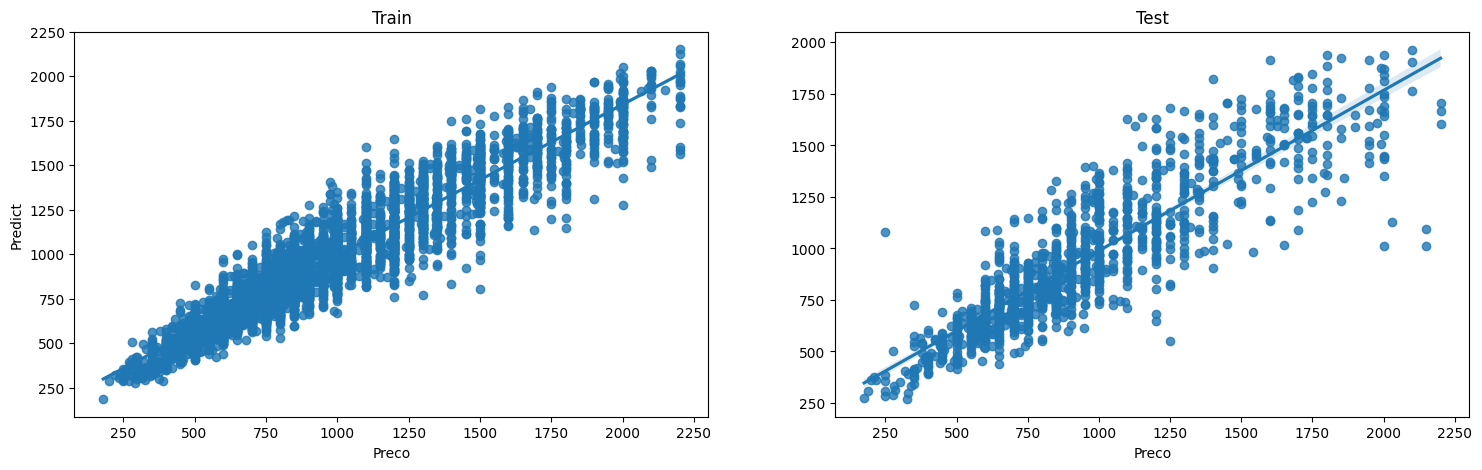

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

In [20]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R2 = {r2}")
print(f"MAE = {mae}")
print(f"RMSE = {rmse}")

R2 = 0.7785728018016924
MAE = 130.99082915072566
RMSE = 183.3817137646883


# Feature Selection

In [21]:
from feature_engine.selection import SelectByShuffling

X_train_transformed = data_tree_pipe.fit_transform(X_train)
X_test_transformed  = data_tree_pipe.transform(X_test)

shuffle = SelectByShuffling(estimator=CatBoostRegressor(), scoring='neg_mean_absolute_error', cv=5)

shuffle.fit(X_train_transformed, y_train)

Learning rate set to 0.051007
0:	learn: 373.1147634	total: 2.51ms	remaining: 2.5s
1:	learn: 362.7691865	total: 4.65ms	remaining: 2.32s
2:	learn: 353.0016279	total: 6.67ms	remaining: 2.22s
3:	learn: 344.0485871	total: 8.55ms	remaining: 2.13s
4:	learn: 335.4864934	total: 10.5ms	remaining: 2.08s
5:	learn: 327.7296486	total: 12.4ms	remaining: 2.05s
6:	learn: 320.2173782	total: 14.3ms	remaining: 2.02s
7:	learn: 313.0385564	total: 16.1ms	remaining: 2s
8:	learn: 306.6415384	total: 18.1ms	remaining: 1.99s
9:	learn: 300.1972392	total: 20ms	remaining: 1.98s
10:	learn: 294.4766423	total: 21.9ms	remaining: 1.97s
11:	learn: 289.1519805	total: 23.8ms	remaining: 1.96s
12:	learn: 283.8027910	total: 25.7ms	remaining: 1.95s
13:	learn: 279.1180414	total: 27.5ms	remaining: 1.94s
14:	learn: 274.9671822	total: 29.5ms	remaining: 1.94s
15:	learn: 270.9296336	total: 31.4ms	remaining: 1.93s
16:	learn: 267.7758267	total: 33.3ms	remaining: 1.92s
17:	learn: 264.6928270	total: 35.2ms	remaining: 1.92s
18:	learn: 261

206:	learn: 177.7743455	total: 398ms	remaining: 1.52s
207:	learn: 177.6684700	total: 400ms	remaining: 1.52s
208:	learn: 177.4438238	total: 402ms	remaining: 1.52s
209:	learn: 177.2691163	total: 404ms	remaining: 1.52s
210:	learn: 177.1775607	total: 406ms	remaining: 1.52s
211:	learn: 177.0199925	total: 408ms	remaining: 1.51s
212:	learn: 176.9157424	total: 409ms	remaining: 1.51s
213:	learn: 176.7319870	total: 411ms	remaining: 1.51s
214:	learn: 176.6384707	total: 413ms	remaining: 1.51s
215:	learn: 176.5272572	total: 415ms	remaining: 1.51s
216:	learn: 176.4243187	total: 417ms	remaining: 1.5s
217:	learn: 176.1826124	total: 419ms	remaining: 1.5s
218:	learn: 176.0870317	total: 421ms	remaining: 1.5s
219:	learn: 175.9255987	total: 423ms	remaining: 1.5s
220:	learn: 175.8083478	total: 425ms	remaining: 1.5s
221:	learn: 175.5328690	total: 428ms	remaining: 1.5s
222:	learn: 175.3802319	total: 430ms	remaining: 1.5s
223:	learn: 175.2685980	total: 432ms	remaining: 1.5s
224:	learn: 175.1553268	total: 434ms

410:	learn: 155.3435889	total: 787ms	remaining: 1.13s
411:	learn: 155.2780265	total: 790ms	remaining: 1.13s
412:	learn: 155.1608101	total: 793ms	remaining: 1.13s
413:	learn: 155.1364981	total: 795ms	remaining: 1.13s
414:	learn: 155.0062388	total: 797ms	remaining: 1.12s
415:	learn: 154.9053800	total: 800ms	remaining: 1.12s
416:	learn: 154.9018944	total: 802ms	remaining: 1.12s
417:	learn: 154.8157827	total: 805ms	remaining: 1.12s
418:	learn: 154.8119194	total: 807ms	remaining: 1.12s
419:	learn: 154.7484344	total: 809ms	remaining: 1.12s
420:	learn: 154.6847662	total: 811ms	remaining: 1.11s
421:	learn: 154.5975612	total: 813ms	remaining: 1.11s
422:	learn: 154.5312551	total: 815ms	remaining: 1.11s
423:	learn: 154.5232084	total: 817ms	remaining: 1.11s
424:	learn: 154.5199041	total: 819ms	remaining: 1.11s
425:	learn: 154.4283156	total: 821ms	remaining: 1.11s
426:	learn: 154.3592115	total: 823ms	remaining: 1.1s
427:	learn: 154.3020491	total: 825ms	remaining: 1.1s
428:	learn: 154.2701148	total:

604:	learn: 143.3521298	total: 1.18s	remaining: 769ms
605:	learn: 143.2953854	total: 1.18s	remaining: 768ms
606:	learn: 143.2376993	total: 1.18s	remaining: 765ms
607:	learn: 143.1569096	total: 1.18s	remaining: 764ms
608:	learn: 143.1292260	total: 1.19s	remaining: 761ms
609:	learn: 143.0814284	total: 1.19s	remaining: 760ms
610:	learn: 142.9989423	total: 1.19s	remaining: 758ms
611:	learn: 142.9892357	total: 1.19s	remaining: 756ms
612:	learn: 142.9431258	total: 1.19s	remaining: 754ms
613:	learn: 142.8737857	total: 1.2s	remaining: 752ms
614:	learn: 142.7857903	total: 1.2s	remaining: 750ms
615:	learn: 142.6717217	total: 1.2s	remaining: 749ms
616:	learn: 142.6247568	total: 1.2s	remaining: 747ms
617:	learn: 142.5311058	total: 1.2s	remaining: 745ms
618:	learn: 142.4471631	total: 1.21s	remaining: 743ms
619:	learn: 142.3848776	total: 1.21s	remaining: 741ms
620:	learn: 142.2872779	total: 1.21s	remaining: 739ms
621:	learn: 142.2864058	total: 1.21s	remaining: 737ms
622:	learn: 142.2440875	total: 1.

804:	learn: 133.2653880	total: 1.57s	remaining: 381ms
805:	learn: 133.2320692	total: 1.57s	remaining: 379ms
806:	learn: 133.1590623	total: 1.57s	remaining: 377ms
807:	learn: 133.1068510	total: 1.58s	remaining: 375ms
808:	learn: 133.0579114	total: 1.58s	remaining: 373ms
809:	learn: 133.0020745	total: 1.58s	remaining: 371ms
810:	learn: 132.9431045	total: 1.58s	remaining: 369ms
811:	learn: 132.9103855	total: 1.59s	remaining: 367ms
812:	learn: 132.8658770	total: 1.59s	remaining: 365ms
813:	learn: 132.8120830	total: 1.59s	remaining: 363ms
814:	learn: 132.7717740	total: 1.59s	remaining: 361ms
815:	learn: 132.7050663	total: 1.59s	remaining: 359ms
816:	learn: 132.6822384	total: 1.6s	remaining: 358ms
817:	learn: 132.6665400	total: 1.6s	remaining: 356ms
818:	learn: 132.6295375	total: 1.6s	remaining: 354ms
819:	learn: 132.5832783	total: 1.6s	remaining: 352ms
820:	learn: 132.5401993	total: 1.6s	remaining: 350ms
821:	learn: 132.4943833	total: 1.6s	remaining: 348ms
822:	learn: 132.4686700	total: 1.6

Learning rate set to 0.051007
0:	learn: 376.1237240	total: 4.72ms	remaining: 4.72s
1:	learn: 365.6745226	total: 9.06ms	remaining: 4.52s
2:	learn: 355.7468879	total: 12ms	remaining: 3.98s
3:	learn: 346.6292406	total: 14.2ms	remaining: 3.53s
4:	learn: 337.8502774	total: 16.2ms	remaining: 3.22s
5:	learn: 329.9536209	total: 18.1ms	remaining: 2.99s
6:	learn: 322.3258188	total: 19.9ms	remaining: 2.83s
7:	learn: 315.1380376	total: 21.9ms	remaining: 2.71s
8:	learn: 308.4459876	total: 23.7ms	remaining: 2.61s
9:	learn: 301.9116779	total: 25.6ms	remaining: 2.54s
10:	learn: 295.9590230	total: 27.6ms	remaining: 2.48s
11:	learn: 290.5660711	total: 29.5ms	remaining: 2.43s
12:	learn: 285.2513929	total: 31.4ms	remaining: 2.39s
13:	learn: 280.5259681	total: 33.3ms	remaining: 2.35s
14:	learn: 276.6762079	total: 35.2ms	remaining: 2.31s
15:	learn: 272.3743243	total: 37.1ms	remaining: 2.28s
16:	learn: 268.7713275	total: 39ms	remaining: 2.25s
17:	learn: 265.6511151	total: 40.9ms	remaining: 2.23s
18:	learn: 2

201:	learn: 180.7266219	total: 390ms	remaining: 1.54s
202:	learn: 180.6122434	total: 392ms	remaining: 1.54s
203:	learn: 180.4939525	total: 394ms	remaining: 1.54s
204:	learn: 180.3252808	total: 396ms	remaining: 1.54s
205:	learn: 180.1120868	total: 398ms	remaining: 1.53s
206:	learn: 179.9623865	total: 401ms	remaining: 1.53s
207:	learn: 179.7697025	total: 403ms	remaining: 1.53s
208:	learn: 179.5387057	total: 405ms	remaining: 1.53s
209:	learn: 179.3608796	total: 407ms	remaining: 1.53s
210:	learn: 179.1766912	total: 409ms	remaining: 1.53s
211:	learn: 179.0048994	total: 411ms	remaining: 1.53s
212:	learn: 178.7861323	total: 413ms	remaining: 1.52s
213:	learn: 178.5765016	total: 415ms	remaining: 1.52s
214:	learn: 178.3550721	total: 416ms	remaining: 1.52s
215:	learn: 178.1981158	total: 418ms	remaining: 1.52s
216:	learn: 178.0822102	total: 420ms	remaining: 1.52s
217:	learn: 177.9202127	total: 422ms	remaining: 1.51s
218:	learn: 177.7903377	total: 424ms	remaining: 1.51s
219:	learn: 177.6404148	tota

402:	learn: 156.9033223	total: 778ms	remaining: 1.15s
403:	learn: 156.8371523	total: 780ms	remaining: 1.15s
404:	learn: 156.7780017	total: 782ms	remaining: 1.15s
405:	learn: 156.7179404	total: 784ms	remaining: 1.15s
406:	learn: 156.5885614	total: 786ms	remaining: 1.15s
407:	learn: 156.5383368	total: 788ms	remaining: 1.14s
408:	learn: 156.4388877	total: 790ms	remaining: 1.14s
409:	learn: 156.4116626	total: 792ms	remaining: 1.14s
410:	learn: 156.3160910	total: 794ms	remaining: 1.14s
411:	learn: 156.1601837	total: 796ms	remaining: 1.14s
412:	learn: 156.0480813	total: 798ms	remaining: 1.13s
413:	learn: 156.0010916	total: 800ms	remaining: 1.13s
414:	learn: 155.9771575	total: 802ms	remaining: 1.13s
415:	learn: 155.9056159	total: 804ms	remaining: 1.13s
416:	learn: 155.8846568	total: 806ms	remaining: 1.13s
417:	learn: 155.8648293	total: 808ms	remaining: 1.12s
418:	learn: 155.7352100	total: 809ms	remaining: 1.12s
419:	learn: 155.6811980	total: 811ms	remaining: 1.12s
420:	learn: 155.6335789	tota

604:	learn: 142.6350198	total: 1.17s	remaining: 765ms
605:	learn: 142.6132340	total: 1.17s	remaining: 763ms
606:	learn: 142.5662931	total: 1.18s	remaining: 761ms
607:	learn: 142.5193378	total: 1.18s	remaining: 759ms
608:	learn: 142.4546928	total: 1.18s	remaining: 757ms
609:	learn: 142.3791693	total: 1.18s	remaining: 755ms
610:	learn: 142.3618826	total: 1.18s	remaining: 753ms
611:	learn: 142.2974908	total: 1.19s	remaining: 751ms
612:	learn: 142.2642344	total: 1.19s	remaining: 749ms
613:	learn: 142.2094141	total: 1.19s	remaining: 747ms
614:	learn: 142.1210896	total: 1.19s	remaining: 746ms
615:	learn: 142.0176280	total: 1.19s	remaining: 744ms
616:	learn: 141.9410939	total: 1.2s	remaining: 742ms
617:	learn: 141.8980466	total: 1.2s	remaining: 740ms
618:	learn: 141.8559651	total: 1.2s	remaining: 738ms
619:	learn: 141.8111347	total: 1.2s	remaining: 736ms
620:	learn: 141.7469417	total: 1.2s	remaining: 734ms
621:	learn: 141.7034786	total: 1.2s	remaining: 732ms
622:	learn: 141.6278724	total: 1.2

810:	learn: 130.9986083	total: 1.56s	remaining: 365ms
811:	learn: 130.9472626	total: 1.57s	remaining: 363ms
812:	learn: 130.8978532	total: 1.57s	remaining: 361ms
813:	learn: 130.8632005	total: 1.57s	remaining: 359ms
814:	learn: 130.7826271	total: 1.57s	remaining: 357ms
815:	learn: 130.6971091	total: 1.57s	remaining: 355ms
816:	learn: 130.6389500	total: 1.58s	remaining: 353ms
817:	learn: 130.5952195	total: 1.58s	remaining: 351ms
818:	learn: 130.5430309	total: 1.58s	remaining: 349ms
819:	learn: 130.4977933	total: 1.58s	remaining: 347ms
820:	learn: 130.4186428	total: 1.58s	remaining: 346ms
821:	learn: 130.3563232	total: 1.59s	remaining: 344ms
822:	learn: 130.2752402	total: 1.59s	remaining: 342ms
823:	learn: 130.1942984	total: 1.59s	remaining: 340ms
824:	learn: 130.1437482	total: 1.59s	remaining: 338ms
825:	learn: 130.0635355	total: 1.6s	remaining: 336ms
826:	learn: 130.0347977	total: 1.6s	remaining: 334ms
827:	learn: 129.9861521	total: 1.6s	remaining: 332ms
828:	learn: 129.9531302	total: 

967:	learn: 123.5721980	total: 1.96s	remaining: 64.7ms
968:	learn: 123.5231885	total: 1.96s	remaining: 62.7ms
969:	learn: 123.4688419	total: 1.96s	remaining: 60.7ms
970:	learn: 123.4465749	total: 1.97s	remaining: 58.7ms
971:	learn: 123.4038691	total: 1.97s	remaining: 56.7ms
972:	learn: 123.3575869	total: 1.97s	remaining: 54.7ms
973:	learn: 123.3109147	total: 1.97s	remaining: 52.6ms
974:	learn: 123.2596904	total: 1.97s	remaining: 50.6ms
975:	learn: 123.2212236	total: 1.98s	remaining: 48.6ms
976:	learn: 123.1795979	total: 1.98s	remaining: 46.6ms
977:	learn: 123.1558433	total: 1.98s	remaining: 44.5ms
978:	learn: 123.1073905	total: 1.98s	remaining: 42.5ms
979:	learn: 123.0535989	total: 1.98s	remaining: 40.5ms
980:	learn: 123.0048592	total: 1.99s	remaining: 38.5ms
981:	learn: 122.9672042	total: 1.99s	remaining: 36.5ms
982:	learn: 122.9163692	total: 1.99s	remaining: 34.4ms
983:	learn: 122.8852217	total: 1.99s	remaining: 32.4ms
984:	learn: 122.8576077	total: 2s	remaining: 30.4ms
985:	learn: 1

184:	learn: 182.0604711	total: 387ms	remaining: 1.71s
185:	learn: 181.9039318	total: 389ms	remaining: 1.7s
186:	learn: 181.8264305	total: 391ms	remaining: 1.7s
187:	learn: 181.5995311	total: 393ms	remaining: 1.7s
188:	learn: 181.4586159	total: 396ms	remaining: 1.7s
189:	learn: 181.2443138	total: 398ms	remaining: 1.7s
190:	learn: 181.0948966	total: 400ms	remaining: 1.69s
191:	learn: 180.9671223	total: 402ms	remaining: 1.69s
192:	learn: 180.8609533	total: 404ms	remaining: 1.69s
193:	learn: 180.6994112	total: 406ms	remaining: 1.69s
194:	learn: 180.5820898	total: 408ms	remaining: 1.68s
195:	learn: 180.4118677	total: 410ms	remaining: 1.68s
196:	learn: 180.3258920	total: 412ms	remaining: 1.68s
197:	learn: 180.2139535	total: 414ms	remaining: 1.68s
198:	learn: 180.0786526	total: 416ms	remaining: 1.67s
199:	learn: 179.9342725	total: 417ms	remaining: 1.67s
200:	learn: 179.7473755	total: 419ms	remaining: 1.67s
201:	learn: 179.5658966	total: 421ms	remaining: 1.66s
202:	learn: 179.3982346	total: 42

393:	learn: 159.1399317	total: 780ms	remaining: 1.2s
394:	learn: 159.0237633	total: 782ms	remaining: 1.2s
395:	learn: 158.9044052	total: 784ms	remaining: 1.2s
396:	learn: 158.8928924	total: 786ms	remaining: 1.19s
397:	learn: 158.8760351	total: 788ms	remaining: 1.19s
398:	learn: 158.8137103	total: 790ms	remaining: 1.19s
399:	learn: 158.6433848	total: 792ms	remaining: 1.19s
400:	learn: 158.5921703	total: 794ms	remaining: 1.19s
401:	learn: 158.5326741	total: 796ms	remaining: 1.18s
402:	learn: 158.4405192	total: 798ms	remaining: 1.18s
403:	learn: 158.4315594	total: 800ms	remaining: 1.18s
404:	learn: 158.3308360	total: 802ms	remaining: 1.18s
405:	learn: 158.2227312	total: 803ms	remaining: 1.18s
406:	learn: 158.1673514	total: 805ms	remaining: 1.17s
407:	learn: 158.0662048	total: 807ms	remaining: 1.17s
408:	learn: 157.9831563	total: 809ms	remaining: 1.17s
409:	learn: 157.8939221	total: 811ms	remaining: 1.17s
410:	learn: 157.8881807	total: 813ms	remaining: 1.16s
411:	learn: 157.8799813	total: 

572:	learn: 146.8456864	total: 1.17s	remaining: 871ms
573:	learn: 146.7675211	total: 1.17s	remaining: 869ms
574:	learn: 146.7054996	total: 1.17s	remaining: 867ms
575:	learn: 146.6531101	total: 1.17s	remaining: 864ms
576:	learn: 146.5587952	total: 1.18s	remaining: 862ms
577:	learn: 146.5024477	total: 1.18s	remaining: 860ms
578:	learn: 146.4080468	total: 1.18s	remaining: 858ms
579:	learn: 146.3159303	total: 1.18s	remaining: 856ms
580:	learn: 146.2621552	total: 1.18s	remaining: 854ms
581:	learn: 146.1656227	total: 1.19s	remaining: 852ms
582:	learn: 146.1119108	total: 1.19s	remaining: 850ms
583:	learn: 146.0293405	total: 1.19s	remaining: 848ms
584:	learn: 145.9693133	total: 1.19s	remaining: 846ms
585:	learn: 145.9293365	total: 1.19s	remaining: 844ms
586:	learn: 145.9270642	total: 1.2s	remaining: 842ms
587:	learn: 145.8479451	total: 1.2s	remaining: 840ms
588:	learn: 145.7464540	total: 1.2s	remaining: 838ms
589:	learn: 145.6553890	total: 1.2s	remaining: 836ms
590:	learn: 145.6043006	total: 1

779:	learn: 134.5939134	total: 1.56s	remaining: 441ms
780:	learn: 134.5477606	total: 1.57s	remaining: 439ms
781:	learn: 134.4959214	total: 1.57s	remaining: 437ms
782:	learn: 134.4545205	total: 1.57s	remaining: 435ms
783:	learn: 134.4031452	total: 1.57s	remaining: 433ms
784:	learn: 134.3702230	total: 1.57s	remaining: 431ms
785:	learn: 134.2930878	total: 1.58s	remaining: 429ms
786:	learn: 134.2192295	total: 1.58s	remaining: 427ms
787:	learn: 134.1418623	total: 1.58s	remaining: 425ms
788:	learn: 134.0980532	total: 1.58s	remaining: 423ms
789:	learn: 134.0008859	total: 1.58s	remaining: 421ms
790:	learn: 133.9310784	total: 1.59s	remaining: 419ms
791:	learn: 133.8893975	total: 1.59s	remaining: 417ms
792:	learn: 133.8879449	total: 1.59s	remaining: 415ms
793:	learn: 133.8143823	total: 1.59s	remaining: 413ms
794:	learn: 133.8131866	total: 1.59s	remaining: 411ms
795:	learn: 133.7713149	total: 1.59s	remaining: 409ms
796:	learn: 133.7312442	total: 1.6s	remaining: 407ms
797:	learn: 133.6570342	total

987:	learn: 125.1304818	total: 1.96s	remaining: 23.8ms
988:	learn: 125.0999182	total: 1.96s	remaining: 21.8ms
989:	learn: 125.0244172	total: 1.96s	remaining: 19.8ms
990:	learn: 124.9798480	total: 1.96s	remaining: 17.8ms
991:	learn: 124.9314782	total: 1.96s	remaining: 15.8ms
992:	learn: 124.8678083	total: 1.97s	remaining: 13.9ms
993:	learn: 124.8331643	total: 1.97s	remaining: 11.9ms
994:	learn: 124.7885953	total: 1.97s	remaining: 9.9ms
995:	learn: 124.7527340	total: 1.97s	remaining: 7.92ms
996:	learn: 124.6968154	total: 1.97s	remaining: 5.94ms
997:	learn: 124.6298611	total: 1.98s	remaining: 3.96ms
998:	learn: 124.5879887	total: 1.98s	remaining: 1.98ms
999:	learn: 124.5680869	total: 1.98s	remaining: 0us
Learning rate set to 0.051007
0:	learn: 377.2705163	total: 11.6ms	remaining: 11.6s
1:	learn: 366.5672943	total: 19.6ms	remaining: 9.76s
2:	learn: 356.6524013	total: 24.4ms	remaining: 8.1s
3:	learn: 347.6611196	total: 28.3ms	remaining: 7.05s
4:	learn: 338.8067062	total: 31.1ms	remaining: 6

190:	learn: 181.9251590	total: 384ms	remaining: 1.63s
191:	learn: 181.8373637	total: 386ms	remaining: 1.63s
192:	learn: 181.6482778	total: 388ms	remaining: 1.62s
193:	learn: 181.5625228	total: 390ms	remaining: 1.62s
194:	learn: 181.3219231	total: 392ms	remaining: 1.62s
195:	learn: 181.2763695	total: 394ms	remaining: 1.62s
196:	learn: 181.0714413	total: 396ms	remaining: 1.61s
197:	learn: 180.8796589	total: 398ms	remaining: 1.61s
198:	learn: 180.7672893	total: 400ms	remaining: 1.61s
199:	learn: 180.7059597	total: 403ms	remaining: 1.61s
200:	learn: 180.6913850	total: 405ms	remaining: 1.61s
201:	learn: 180.5542466	total: 407ms	remaining: 1.61s
202:	learn: 180.4666277	total: 409ms	remaining: 1.6s
203:	learn: 180.3479926	total: 411ms	remaining: 1.6s
204:	learn: 180.3328596	total: 413ms	remaining: 1.6s
205:	learn: 180.1350656	total: 415ms	remaining: 1.6s
206:	learn: 179.9763684	total: 417ms	remaining: 1.6s
207:	learn: 179.7884772	total: 419ms	remaining: 1.59s
208:	learn: 179.5509849	total: 42

395:	learn: 159.1959007	total: 776ms	remaining: 1.18s
396:	learn: 159.1608529	total: 778ms	remaining: 1.18s
397:	learn: 159.0511274	total: 780ms	remaining: 1.18s
398:	learn: 158.9623779	total: 782ms	remaining: 1.18s
399:	learn: 158.8565159	total: 784ms	remaining: 1.18s
400:	learn: 158.7808847	total: 786ms	remaining: 1.17s
401:	learn: 158.6193549	total: 788ms	remaining: 1.17s
402:	learn: 158.5042692	total: 791ms	remaining: 1.17s
403:	learn: 158.3838389	total: 792ms	remaining: 1.17s
404:	learn: 158.2632993	total: 794ms	remaining: 1.17s
405:	learn: 158.1878358	total: 796ms	remaining: 1.16s
406:	learn: 158.0630184	total: 798ms	remaining: 1.16s
407:	learn: 157.9156783	total: 800ms	remaining: 1.16s
408:	learn: 157.8401178	total: 802ms	remaining: 1.16s
409:	learn: 157.8005299	total: 804ms	remaining: 1.16s
410:	learn: 157.7203763	total: 806ms	remaining: 1.15s
411:	learn: 157.6596774	total: 807ms	remaining: 1.15s
412:	learn: 157.5451058	total: 809ms	remaining: 1.15s
413:	learn: 157.5404210	tota

598:	learn: 143.7224306	total: 1.17s	remaining: 782ms
599:	learn: 143.6508871	total: 1.17s	remaining: 780ms
600:	learn: 143.5903925	total: 1.17s	remaining: 778ms
601:	learn: 143.5323059	total: 1.17s	remaining: 776ms
602:	learn: 143.4841589	total: 1.18s	remaining: 774ms
603:	learn: 143.3822752	total: 1.18s	remaining: 773ms
604:	learn: 143.3242419	total: 1.18s	remaining: 771ms
605:	learn: 143.2607244	total: 1.18s	remaining: 769ms
606:	learn: 143.2086922	total: 1.18s	remaining: 767ms
607:	learn: 143.1279235	total: 1.19s	remaining: 765ms
608:	learn: 143.0415113	total: 1.19s	remaining: 763ms
609:	learn: 142.9618617	total: 1.19s	remaining: 761ms
610:	learn: 142.9117720	total: 1.19s	remaining: 759ms
611:	learn: 142.9089393	total: 1.19s	remaining: 757ms
612:	learn: 142.8523432	total: 1.2s	remaining: 755ms
613:	learn: 142.7533208	total: 1.2s	remaining: 753ms
614:	learn: 142.6688738	total: 1.2s	remaining: 751ms
615:	learn: 142.6177496	total: 1.2s	remaining: 749ms
616:	learn: 142.5252843	total: 1

766:	learn: 134.0589522	total: 1.54s	remaining: 467ms
767:	learn: 134.0577960	total: 1.54s	remaining: 465ms
768:	learn: 133.9840181	total: 1.54s	remaining: 463ms
769:	learn: 133.9153506	total: 1.54s	remaining: 461ms
770:	learn: 133.8769282	total: 1.54s	remaining: 459ms
771:	learn: 133.8302790	total: 1.55s	remaining: 457ms
772:	learn: 133.7581602	total: 1.55s	remaining: 455ms
773:	learn: 133.7152143	total: 1.55s	remaining: 453ms
774:	learn: 133.7134118	total: 1.55s	remaining: 451ms
775:	learn: 133.6750079	total: 1.55s	remaining: 449ms
776:	learn: 133.6733426	total: 1.56s	remaining: 447ms
777:	learn: 133.6270906	total: 1.56s	remaining: 445ms
778:	learn: 133.5790521	total: 1.56s	remaining: 443ms
779:	learn: 133.5773020	total: 1.56s	remaining: 441ms
780:	learn: 133.5502110	total: 1.56s	remaining: 439ms
781:	learn: 133.5071105	total: 1.57s	remaining: 437ms
782:	learn: 133.4740142	total: 1.57s	remaining: 435ms
783:	learn: 133.4151355	total: 1.57s	remaining: 433ms
784:	learn: 133.3976419	tota

971:	learn: 124.7962282	total: 1.93s	remaining: 55.5ms
972:	learn: 124.7765906	total: 1.93s	remaining: 53.6ms
973:	learn: 124.7310456	total: 1.93s	remaining: 51.6ms
974:	learn: 124.6991427	total: 1.93s	remaining: 49.6ms
975:	learn: 124.6711630	total: 1.94s	remaining: 47.6ms
976:	learn: 124.6096558	total: 1.94s	remaining: 45.6ms
977:	learn: 124.5772542	total: 1.94s	remaining: 43.7ms
978:	learn: 124.4939561	total: 1.94s	remaining: 41.7ms
979:	learn: 124.4755688	total: 1.94s	remaining: 39.7ms
980:	learn: 124.4274308	total: 1.95s	remaining: 37.7ms
981:	learn: 124.3885214	total: 1.95s	remaining: 35.7ms
982:	learn: 124.3876503	total: 1.95s	remaining: 33.7ms
983:	learn: 124.3247586	total: 1.95s	remaining: 31.7ms
984:	learn: 124.2699308	total: 1.95s	remaining: 29.8ms
985:	learn: 124.2504200	total: 1.96s	remaining: 27.8ms
986:	learn: 124.2069100	total: 1.96s	remaining: 25.8ms
987:	learn: 124.1431932	total: 1.96s	remaining: 23.8ms
988:	learn: 124.1146398	total: 1.96s	remaining: 21.8ms
989:	learn

176:	learn: 185.8705712	total: 373ms	remaining: 1.73s
177:	learn: 185.6183259	total: 376ms	remaining: 1.73s
178:	learn: 185.3880822	total: 378ms	remaining: 1.74s
179:	learn: 185.3160145	total: 381ms	remaining: 1.74s
180:	learn: 185.1182121	total: 383ms	remaining: 1.74s
181:	learn: 184.7628381	total: 386ms	remaining: 1.73s
182:	learn: 184.6441111	total: 388ms	remaining: 1.73s
183:	learn: 184.4289425	total: 391ms	remaining: 1.73s
184:	learn: 184.2751318	total: 393ms	remaining: 1.73s
185:	learn: 184.0077378	total: 395ms	remaining: 1.73s
186:	learn: 183.9125283	total: 397ms	remaining: 1.72s
187:	learn: 183.6031548	total: 398ms	remaining: 1.72s
188:	learn: 183.4991836	total: 400ms	remaining: 1.72s
189:	learn: 183.1697627	total: 402ms	remaining: 1.71s
190:	learn: 183.0175322	total: 404ms	remaining: 1.71s
191:	learn: 182.9105104	total: 406ms	remaining: 1.71s
192:	learn: 182.8081654	total: 408ms	remaining: 1.71s
193:	learn: 182.6985770	total: 410ms	remaining: 1.7s
194:	learn: 182.5712083	total

341:	learn: 164.3447534	total: 749ms	remaining: 1.44s
342:	learn: 164.2618111	total: 752ms	remaining: 1.44s
343:	learn: 163.9486166	total: 754ms	remaining: 1.44s
344:	learn: 163.8601978	total: 756ms	remaining: 1.44s
345:	learn: 163.7144271	total: 759ms	remaining: 1.43s
346:	learn: 163.6056284	total: 761ms	remaining: 1.43s
347:	learn: 163.5989219	total: 763ms	remaining: 1.43s
348:	learn: 163.4093593	total: 765ms	remaining: 1.43s
349:	learn: 163.1908205	total: 767ms	remaining: 1.42s
350:	learn: 163.1674106	total: 769ms	remaining: 1.42s
351:	learn: 163.0323719	total: 771ms	remaining: 1.42s
352:	learn: 162.9580728	total: 773ms	remaining: 1.42s
353:	learn: 162.8630712	total: 775ms	remaining: 1.41s
354:	learn: 162.8499218	total: 776ms	remaining: 1.41s
355:	learn: 162.8454927	total: 778ms	remaining: 1.41s
356:	learn: 162.8332848	total: 780ms	remaining: 1.4s
357:	learn: 162.6433116	total: 782ms	remaining: 1.4s
358:	learn: 162.5811093	total: 784ms	remaining: 1.4s
359:	learn: 162.5647291	total: 

548:	learn: 148.4566641	total: 1.14s	remaining: 938ms
549:	learn: 148.3894094	total: 1.14s	remaining: 936ms
550:	learn: 148.3162350	total: 1.15s	remaining: 934ms
551:	learn: 148.2879616	total: 1.15s	remaining: 931ms
552:	learn: 148.2480723	total: 1.15s	remaining: 929ms
553:	learn: 148.1602799	total: 1.15s	remaining: 927ms
554:	learn: 148.0735710	total: 1.15s	remaining: 925ms
555:	learn: 148.0635559	total: 1.16s	remaining: 923ms
556:	learn: 148.0606027	total: 1.16s	remaining: 921ms
557:	learn: 147.9504277	total: 1.16s	remaining: 919ms
558:	learn: 147.8804513	total: 1.16s	remaining: 917ms
559:	learn: 147.8782762	total: 1.16s	remaining: 914ms
560:	learn: 147.7644636	total: 1.17s	remaining: 912ms
561:	learn: 147.7617227	total: 1.17s	remaining: 910ms
562:	learn: 147.7037269	total: 1.17s	remaining: 907ms
563:	learn: 147.6937900	total: 1.17s	remaining: 905ms
564:	learn: 147.6533602	total: 1.17s	remaining: 903ms
565:	learn: 147.6516482	total: 1.17s	remaining: 900ms
566:	learn: 147.5468415	tota

717:	learn: 138.2881734	total: 1.53s	remaining: 602ms
718:	learn: 138.2566129	total: 1.53s	remaining: 600ms
719:	learn: 138.1547634	total: 1.54s	remaining: 598ms
720:	learn: 138.0612877	total: 1.54s	remaining: 596ms
721:	learn: 138.0098434	total: 1.54s	remaining: 594ms
722:	learn: 137.9533308	total: 1.55s	remaining: 592ms
723:	learn: 137.8945771	total: 1.55s	remaining: 590ms
724:	learn: 137.8527489	total: 1.55s	remaining: 588ms
725:	learn: 137.7537734	total: 1.55s	remaining: 586ms
726:	learn: 137.7086436	total: 1.56s	remaining: 584ms
727:	learn: 137.6572799	total: 1.56s	remaining: 582ms
728:	learn: 137.5807963	total: 1.56s	remaining: 580ms
729:	learn: 137.4763364	total: 1.56s	remaining: 578ms
730:	learn: 137.4751969	total: 1.57s	remaining: 576ms
731:	learn: 137.4190066	total: 1.57s	remaining: 574ms
732:	learn: 137.3945357	total: 1.57s	remaining: 572ms
733:	learn: 137.3930745	total: 1.57s	remaining: 570ms
734:	learn: 137.3560549	total: 1.57s	remaining: 568ms
735:	learn: 137.2891552	tota

910:	learn: 128.2198642	total: 1.93s	remaining: 188ms
911:	learn: 128.1775891	total: 1.93s	remaining: 186ms
912:	learn: 128.1344438	total: 1.93s	remaining: 184ms
913:	learn: 128.0770152	total: 1.93s	remaining: 182ms
914:	learn: 128.0450578	total: 1.93s	remaining: 180ms
915:	learn: 127.9664564	total: 1.94s	remaining: 178ms
916:	learn: 127.9402420	total: 1.94s	remaining: 175ms
917:	learn: 127.8688303	total: 1.94s	remaining: 173ms
918:	learn: 127.8327474	total: 1.94s	remaining: 171ms
919:	learn: 127.7749748	total: 1.94s	remaining: 169ms
920:	learn: 127.7148094	total: 1.95s	remaining: 167ms
921:	learn: 127.6172908	total: 1.95s	remaining: 165ms
922:	learn: 127.5611908	total: 1.95s	remaining: 163ms
923:	learn: 127.5039183	total: 1.95s	remaining: 161ms
924:	learn: 127.4504946	total: 1.95s	remaining: 158ms
925:	learn: 127.3902479	total: 1.96s	remaining: 156ms
926:	learn: 127.3841552	total: 1.96s	remaining: 154ms
927:	learn: 127.3192119	total: 1.96s	remaining: 152ms
928:	learn: 127.3182403	tota

SelectByShuffling(cv=5,
                  estimator=<catboost.core.CatBoostRegressor object at 0x000002D950576A70>,
                  scoring='neg_mean_absolute_error')

In [22]:
print(f"Qtde de variáveis antes da remoção: {X_train_transformed.shape[1]}")
print(f"Qtde de variáveis a serem removidas: {len(shuffle.features_to_drop_)}")
print(f"Qtde de variáveis depois da remoção: {X_train_transformed.shape[1] - len(shuffle.features_to_drop_)}")
 

Qtde de variáveis antes da remoção: 87
Qtde de variáveis a serem removidas: 76
Qtde de variáveis depois da remoção: 11


In [23]:
X_train_transformed_reduzido = shuffle.transform(X_train_transformed)
X_test_transformed_reduzido  = shuffle.transform(X_test_transformed)

In [24]:

catboost = CatBoostRegressor()

catboost.fit(X_train_transformed_reduzido, y_train)
     

Learning rate set to 0.052838
0:	learn: 376.7835433	total: 2.16ms	remaining: 2.15s
1:	learn: 365.6974080	total: 3.86ms	remaining: 1.93s
2:	learn: 354.9529495	total: 5.41ms	remaining: 1.8s
3:	learn: 344.9323732	total: 6.91ms	remaining: 1.72s
4:	learn: 335.8830108	total: 8.43ms	remaining: 1.68s
5:	learn: 327.6456301	total: 9.91ms	remaining: 1.64s
6:	learn: 319.6357912	total: 11.5ms	remaining: 1.62s
7:	learn: 312.0622084	total: 13ms	remaining: 1.61s
8:	learn: 305.5031365	total: 14.5ms	remaining: 1.6s
9:	learn: 299.2813894	total: 16ms	remaining: 1.58s
10:	learn: 293.6224697	total: 17.5ms	remaining: 1.57s
11:	learn: 287.9254008	total: 19ms	remaining: 1.56s
12:	learn: 282.8299850	total: 20.5ms	remaining: 1.56s
13:	learn: 277.9945874	total: 22.1ms	remaining: 1.56s
14:	learn: 273.1159064	total: 23.7ms	remaining: 1.55s
15:	learn: 268.6997794	total: 25.2ms	remaining: 1.55s
16:	learn: 265.1608291	total: 26.7ms	remaining: 1.54s
17:	learn: 261.6431682	total: 28.2ms	remaining: 1.54s
18:	learn: 258.3

248:	learn: 178.6466611	total: 381ms	remaining: 1.15s
249:	learn: 178.4537347	total: 383ms	remaining: 1.15s
250:	learn: 178.4417216	total: 384ms	remaining: 1.15s
251:	learn: 178.3762914	total: 386ms	remaining: 1.14s
252:	learn: 178.3634753	total: 387ms	remaining: 1.14s
253:	learn: 178.2342184	total: 389ms	remaining: 1.14s
254:	learn: 178.0698249	total: 390ms	remaining: 1.14s
255:	learn: 177.9748065	total: 392ms	remaining: 1.14s
256:	learn: 177.9424083	total: 393ms	remaining: 1.14s
257:	learn: 177.8456775	total: 395ms	remaining: 1.14s
258:	learn: 177.8172310	total: 396ms	remaining: 1.13s
259:	learn: 177.8084305	total: 398ms	remaining: 1.13s
260:	learn: 177.7228602	total: 399ms	remaining: 1.13s
261:	learn: 177.6154376	total: 401ms	remaining: 1.13s
262:	learn: 177.6004063	total: 403ms	remaining: 1.13s
263:	learn: 177.5862143	total: 404ms	remaining: 1.13s
264:	learn: 177.4599874	total: 406ms	remaining: 1.13s
265:	learn: 177.3436405	total: 407ms	remaining: 1.12s
266:	learn: 177.2633142	tota

503:	learn: 161.4990622	total: 769ms	remaining: 757ms
504:	learn: 161.4967748	total: 771ms	remaining: 755ms
505:	learn: 161.4509615	total: 773ms	remaining: 754ms
506:	learn: 161.3439125	total: 774ms	remaining: 753ms
507:	learn: 161.2774072	total: 776ms	remaining: 752ms
508:	learn: 161.1857577	total: 778ms	remaining: 750ms
509:	learn: 161.1275865	total: 780ms	remaining: 749ms
510:	learn: 161.1260120	total: 781ms	remaining: 748ms
511:	learn: 161.0600531	total: 783ms	remaining: 746ms
512:	learn: 161.0267750	total: 785ms	remaining: 745ms
513:	learn: 160.9743819	total: 786ms	remaining: 744ms
514:	learn: 160.9728822	total: 788ms	remaining: 742ms
515:	learn: 160.9395362	total: 790ms	remaining: 741ms
516:	learn: 160.8467019	total: 791ms	remaining: 739ms
517:	learn: 160.7882252	total: 793ms	remaining: 738ms
518:	learn: 160.7527956	total: 794ms	remaining: 736ms
519:	learn: 160.6770871	total: 796ms	remaining: 735ms
520:	learn: 160.6424870	total: 798ms	remaining: 733ms
521:	learn: 160.6010796	tota

742:	learn: 150.1450842	total: 1.16s	remaining: 400ms
743:	learn: 150.1111719	total: 1.16s	remaining: 398ms
744:	learn: 150.0521915	total: 1.16s	remaining: 397ms
745:	learn: 150.0350171	total: 1.16s	remaining: 395ms
746:	learn: 150.0098860	total: 1.16s	remaining: 393ms
747:	learn: 149.9738612	total: 1.16s	remaining: 392ms
748:	learn: 149.9529269	total: 1.16s	remaining: 390ms
749:	learn: 149.9196961	total: 1.17s	remaining: 389ms
750:	learn: 149.8874217	total: 1.17s	remaining: 387ms
751:	learn: 149.8764728	total: 1.17s	remaining: 386ms
752:	learn: 149.8487339	total: 1.17s	remaining: 384ms
753:	learn: 149.8168833	total: 1.17s	remaining: 383ms
754:	learn: 149.7844240	total: 1.17s	remaining: 381ms
755:	learn: 149.7315738	total: 1.18s	remaining: 380ms
756:	learn: 149.6438473	total: 1.18s	remaining: 378ms
757:	learn: 149.5900131	total: 1.18s	remaining: 377ms
758:	learn: 149.5669327	total: 1.18s	remaining: 375ms
759:	learn: 149.5221609	total: 1.18s	remaining: 373ms
760:	learn: 149.4950964	tota

In [25]:

y_pred_train = catboost.predict(X_train_transformed_reduzido)
y_pred_test  = catboost.predict(X_test_transformed_reduzido)

In [26]:

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R2 = {r2}")
print(f"MAE = {mae}")
print(f"RMSE = {rmse}")

R2 = 0.7648242867544253
MAE = 133.94716156714938
RMSE = 188.98910989020766


Com menos variáveis não conseguimos melhorar o R2 e o RMSE, enquanto o MAE ficou na mesma faixa.